In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1.0,0,N,5000.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1.0,1-9999,N,108590.0,1.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1.0,0,N,5000.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1.0,10000-24999,N,6692.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1.0,100000-499999,N,142590.0,1.0


In [2]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [3]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

NAME                      6065
APPLICATION_TYPE            13
AFFILIATION                  5
CLASSIFICATION              40
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
dtype: int64

In [4]:
charity_df.APPLICATION_TYPE.value_counts()

T3     7537
T4      394
T8      380
T6      372
T10     265
T19     261
T7      231
T5      171
T9       46
T13      18
T12       7
T2        6
T29       1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Print out application counts
application_counts = charity_df.APPLICATION_TYPE.value_counts()

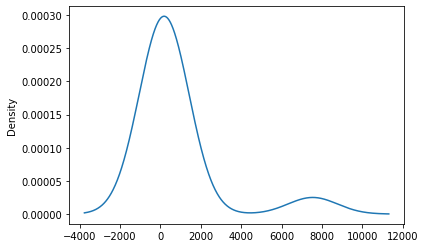

In [6]:
# Visualize the value counts
application_counts.plot.density()

In [7]:
# Determine which values to replace
replace_application = list(application_counts[application_counts < 50].index)

# Replace in DataFrame
for APPLICATION_TYPE in replace_application:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(APPLICATION_TYPE,"OTHER")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       7537
T4        394
T8        380
T6        372
T10       265
T19       261
T7        231
T5        171
OTHER      78
Name: APPLICATION_TYPE, dtype: int64

In [8]:
charity_df.CLASSIFICATION.value_counts()

C1000    5269
C2000    1814
C1200    1296
C3000     376
C2100     282
C7000     226
C1700     106
C4000      65
C5000      38
C2700      34
C7100      28
C1270      22
C2800      20
C7200      16
C1240      12
C2300      11
C1300       9
C7120       7
C1800       6
C1400       6
C8200       5
C1230       5
C1500       5
C7210       4
C6000       3
C1280       3
C8000       3
C4100       2
C1238       2
C1260       2
C2710       2
C1250       2
C1720       1
C1245       1
C2561       1
C8210       1
C2400       1
C4500       1
C1257       1
C1235       1
Name: CLASSIFICATION, dtype: int64

In [9]:
classification_counts = charity_df.CLASSIFICATION.value_counts()

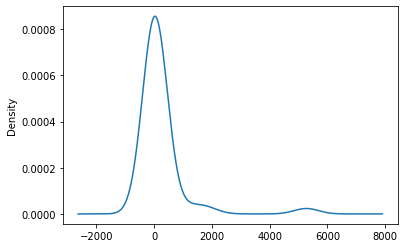

In [10]:
classification_counts.plot.density()

In [11]:
# Determine which values to replace
replace_classification = list(classification_counts[classification_counts < 50].index)

# Replace in DataFrame
for CLASSIFICATION in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(CLASSIFICATION,"OTHER")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    5269
C2000    1814
C1200    1296
C3000     376
C2100     282
OTHER     255
C7000     226
C1700     106
C4000      65
Name: CLASSIFICATION, dtype: int64

In [12]:
charity_df.SPECIAL_CONSIDERATIONS.value_counts()

N    9683
Y       6
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [13]:
print(charity_df.isna().sum().sum())

10


In [14]:
charity_df = charity_df.dropna()

In [15]:
charity_df_cleaned = charity_df.drop(columns=['EIN','NAME','SPECIAL_CONSIDERATIONS'])

In [16]:
charity_cat = charity_df_cleaned.dtypes[charity_df_cleaned.dtypes == "object"].index.tolist()

In [17]:
charity_df_cleaned[charity_cat].nunique()

APPLICATION_TYPE    9
AFFILIATION         5
CLASSIFICATION      9
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          9
dtype: int64

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df_cleaned[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df_cleaned.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,5000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,108590.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6692.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,142590.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 78)

In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 14
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
228/228 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.6208
Epoch 2/100
228/228 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.7104
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7224
Epoch 4/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7241
Epoch 5/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7282
Epoch 6/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7291
Epoch 7/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7344
Epoch 8/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7348
Epoch 9/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7373
Epoch 10/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5437 - accura